# Time Series Forecasting

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read The dataset

In [2]:
import pandas as pd
df = pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Data Preprocessing

In [4]:
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
df.index = df['Month']

In [7]:
df

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [8]:
# Drop the month column
df = df.drop(labels=['Month'],axis=1)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
df.columns = ['nPass']
df

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Visualize the time series

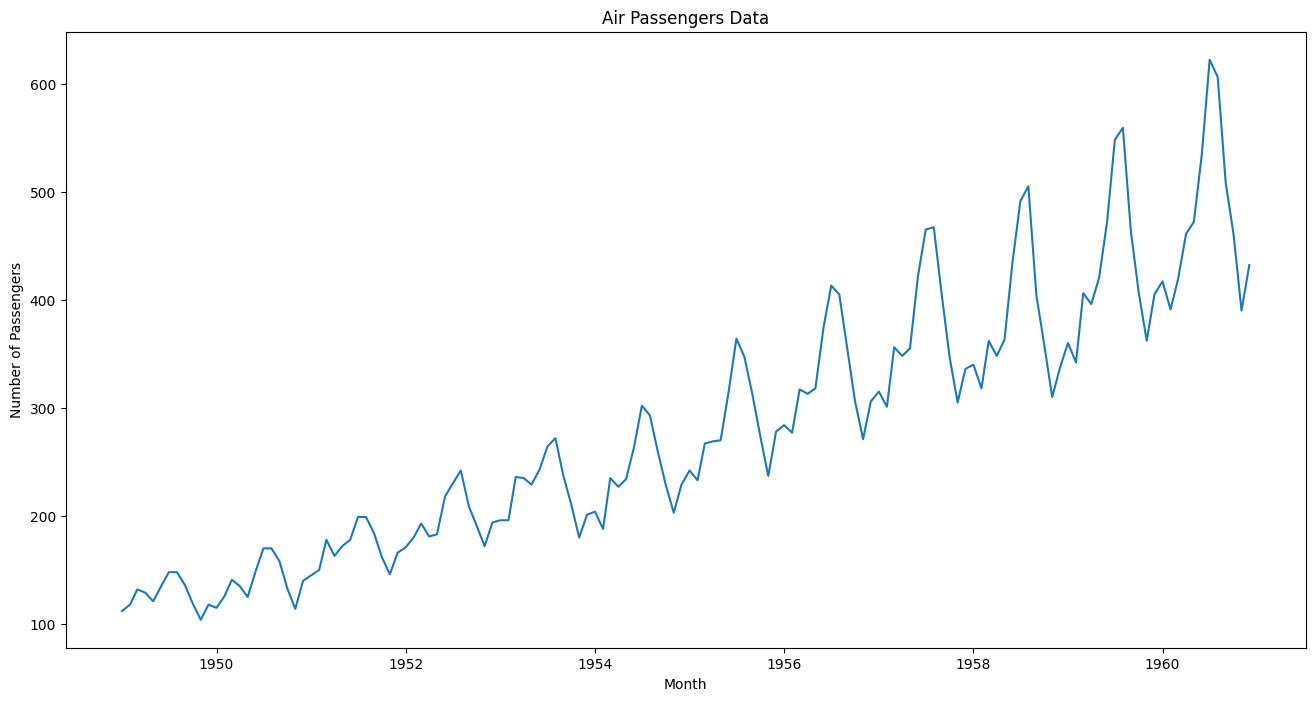

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['nPass'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Data')
plt.show()

### Time Series Decomposition

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
T = seasonal_decompose(df['nPass'],model='multiplicative')

<Axes: title={'center': 'Observed'}, xlabel='Month'>

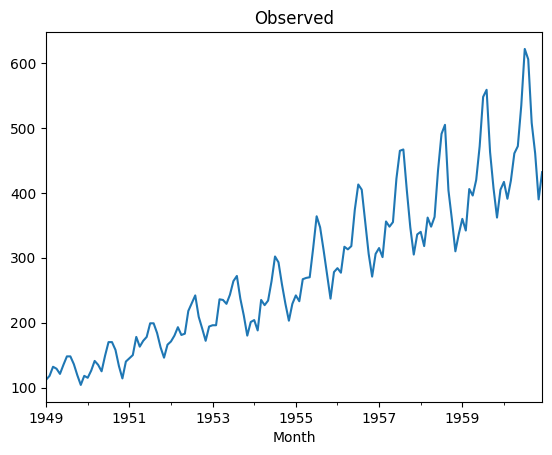

In [13]:
T.observed.plot(title='Observed')

<Axes: title={'center': 'Trend Line'}, xlabel='Month'>

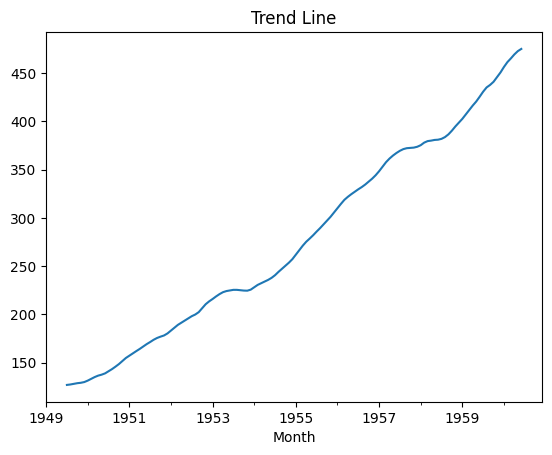

In [14]:
T.trend.plot(title='Trend Line')

<Axes: title={'center': 'Seasonal'}, xlabel='Month'>

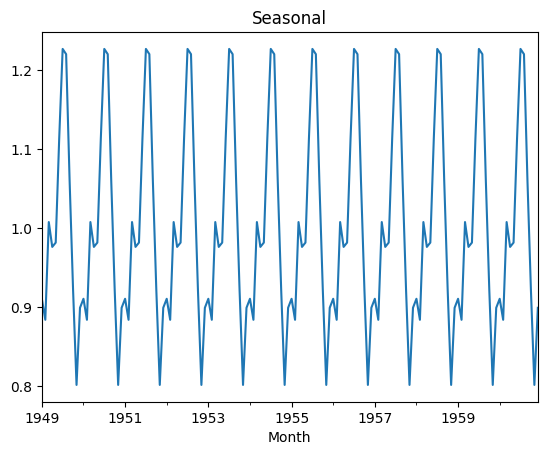

In [15]:
T.seasonal.plot(title='Seasonal')

<Axes: title={'center': 'Residuals'}, xlabel='Month'>

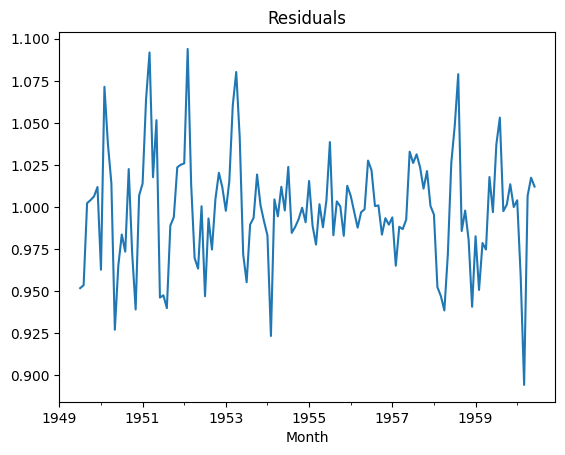

In [16]:
T.resid.plot(title='Residuals')

### Forecast this data for next 3 years

In [17]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


## Restart and run all cells

### Model building

In [18]:
from pmdarima.arima import auto_arima

In [19]:
model = auto_arima(df['nPass'],seasonal=True,suppress_warnings=True,m=12)

In [20]:
model.order

(2, 1, 1)

In [21]:
p = model.order[0]
d = model.order[1]
q = model.order[2]
print(f'Optimal p, d, q values are p={p}, d={d}, q={q} ')

Optimal p, d, q values are p=2, d=1, q=1 


### Forecasting

In [22]:
forecast, conf_int = model.predict(n_periods=36, return_conf_int=True)

In [23]:
forecast

1961-01-01    445.634992
1961-02-01    420.395105
1961-03-01    449.198453
1961-04-01    491.840097
1961-05-01    503.394636
1961-06-01    566.862614
1961-07-01    654.260339
1961-08-01    638.597647
1961-09-01    540.883896
1961-10-01    494.126769
1961-11-01    423.332850
1961-12-01    465.507710
1962-01-01    479.291071
1962-02-01    454.177076
1962-03-01    483.087244
1962-04-01    525.819525
1962-05-01    537.450970
1962-06-01    600.984203
1962-07-01    688.437297
1962-08-01    672.821587
1962-09-01    575.147699
1962-10-01    528.424396
1962-11-01    457.659177
1962-12-01    499.858389
1963-01-01    513.662413
1963-02-01    488.565951
1963-03-01    517.490995
1963-04-01    560.235899
1963-05-01    571.878055
1963-06-01    635.420375
1963-07-01    722.881180
1963-08-01    707.272013
1963-09-01    609.603676
1963-10-01    562.885084
1963-11-01    492.123862
1963-12-01    534.326466
Freq: MS, dtype: float64

In [24]:
conf_int

array([[423.34489452, 467.92508914],
       [394.23553286, 446.55467616],
       [419.8319086 , 478.56499685],
       [460.37651071, 523.30368317],
       [470.38074798, 536.40852429],
       [532.69965017, 601.02557729],
       [619.22148904, 689.29918852],
       [602.88021444, 674.31508021],
       [504.631608  , 577.13618405],
       [457.4462536 , 530.80728394],
       [386.30415484, 460.36154489],
       [428.19162446, 502.82379516],
       [433.49783917, 525.08430312],
       [405.10925177, 503.2449    ],
       [431.15604952, 535.01843851],
       [471.84099724, 579.79805341],
       [481.87405382, 593.02788711],
       [544.15708549, 657.81132058],
       [630.60927168, 746.26532271],
       [614.17968221, 731.46349108],
       [515.83291243, 634.46248521],
       [468.54460838, 588.30418339],
       [397.29775847, 518.02059561],
       [439.08041825, 560.63635994],
       [446.32773032, 580.99709628],
       [418.31885971, 558.8130414 ],
       [444.62493608, 590.35705411],
 

In [25]:
low_bound = conf_int[:,0]
low_bound = pd.Series(low_bound)
low_bound.index = forecast.index
low_bound.head()

1961-01-01    423.344895
1961-02-01    394.235533
1961-03-01    419.831909
1961-04-01    460.376511
1961-05-01    470.380748
Freq: MS, dtype: float64

In [26]:
upper_bound = conf_int[:,1]
upper_bound = pd.Series(upper_bound)
upper_bound.index=forecast.index
upper_bound.head()

1961-01-01    467.925089
1961-02-01    446.554676
1961-03-01    478.564997
1961-04-01    523.303683
1961-05-01    536.408524
Freq: MS, dtype: float64

### Storing forecasted values to CSV file

In [27]:
df_forecast = forecast.to_frame()

In [28]:
df_forecast.columns= ['Forecast']

In [29]:
df_forecast

,Forecast
1961-01-01,445.634992
1961-02-01,420.395105
1961-03-01,449.198453
1961-04-01,491.840097
1961-05-01,503.394636
1961-06-01,566.862614
1961-07-01,654.260339
1961-08-01,638.597647
1961-09-01,540.883896
1961-10-01,494.126769


In [30]:
df_forecast['Lower']=low_bound
df_forecast['Upper']=upper_bound

In [31]:
df_forecast

,Forecast,Lower,Upper
1961-01-01,445.634992,423.344895,467.925089
1961-02-01,420.395105,394.235533,446.554676
1961-03-01,449.198453,419.831909,478.564997
1961-04-01,491.840097,460.376511,523.303683
1961-05-01,503.394636,470.380748,536.408524
1961-06-01,566.862614,532.699650,601.025577
1961-07-01,654.260339,619.221489,689.299189
1961-08-01,638.597647,602.880214,674.315080
1961-09-01,540.883896,504.631608,577.136184
1961-10-01,494.126769,457.446254,530.807284


In [34]:
for i in df_forecast.columns:
    df_forecast[i] = df_forecast[i].apply(round)

In [35]:
df_forecast

,Forecast,Lower,Upper
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


In [37]:
# Storing values to csv
df_forecast.to_csv('Forecast.csv',index=True)

### Visualize the time series data

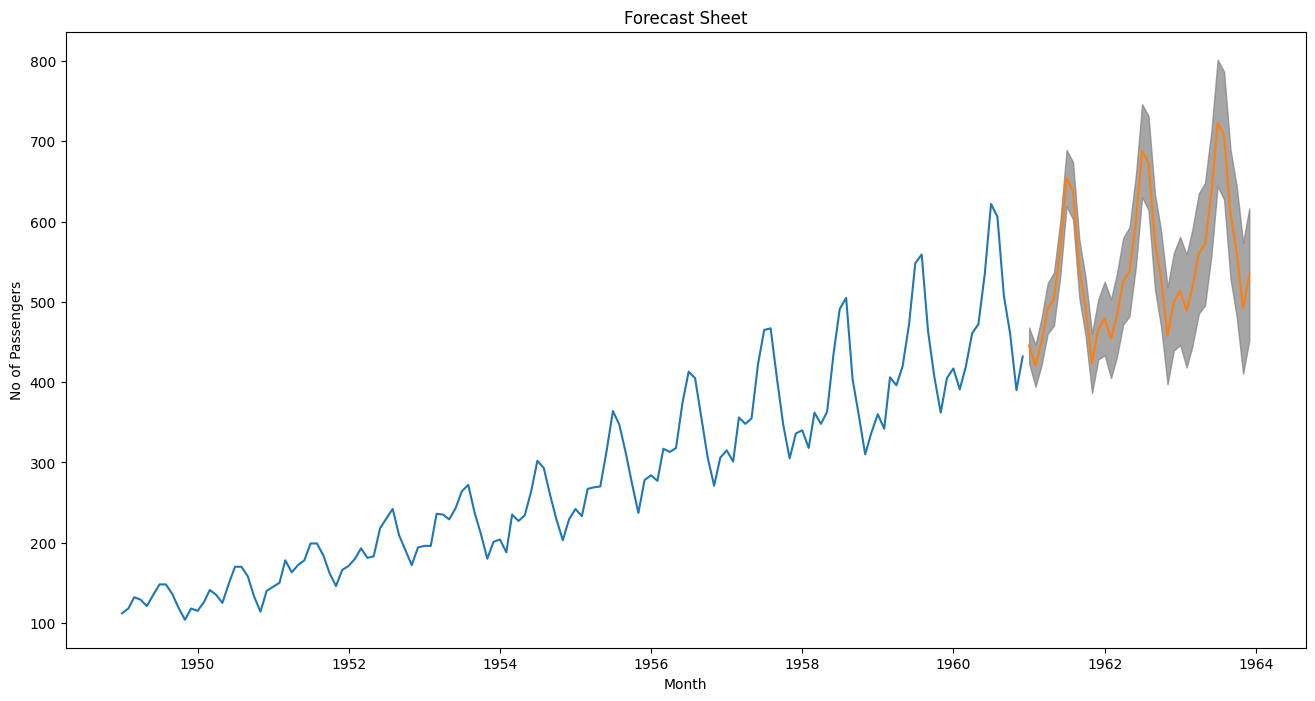

In [41]:
plt.figure(figsize=(16,8))
plt.plot(df['nPass'],label='Actual')
plt.plot(forecast,label='Fprecast')
plt.fill_between(forecast.index,low_bound,upper_bound,alpha=0.7,color='gray',label='Confidence Intetrval')
plt.xlabel('Month')
plt.ylabel('No of Passengers')
plt.title('Forecast Sheet')
plt.savefig('Forecast.png',bbox_inches='tight')
plt.show()